In [1]:
import pandas as pd

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Cars93.csv")

In [5]:
A.head()


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [7]:
from Wd8pm import replacer
replacer(A)

In [9]:
Y = A[["Weight"]]
X = A.drop(labels=["Make","id","Model","Weight"],axis=1)
from Wd8pm import catcon
cat,con = catcon(X)
Xnew = pd.get_dummies(X[cat]).join(X[con])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [10]:
xtrain.head(2)


,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
57,0,0,0,0,0,0,0,0,0,0,...,5100,2425,14.5,5,175,105,67,34,26.0,12.0
31,0,0,0,0,0,0,0,0,0,0,...,6500,2410,13.2,5,171,98,67,36,28.0,12.0


In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

tr_err,ts_err

(0.0, 138.94736842105263)

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=6)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

tr_err,ts_err

(43.358108108108105, 163.3947368421053)

In [13]:
tr = []
ts = []
for i in range(2,40,1):
    dtr = DecisionTreeRegressor(min_samples_split=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

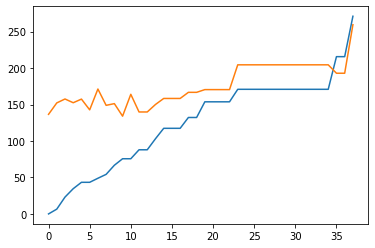

In [14]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

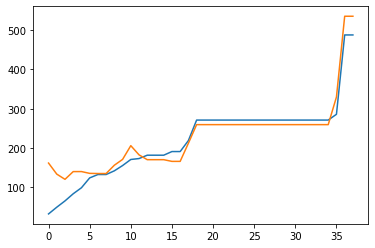

In [15]:
tr = []
ts = []
for i in range(2,40,1):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [16]:
dtr = DecisionTreeRegressor(min_samples_leaf=8)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(132.53576303576304, 135.06702361965517)

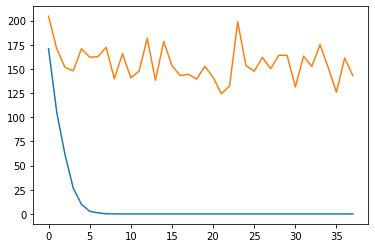

In [17]:
tr = []
ts = []
for i in range(2,40,1):
    dtr = DecisionTreeRegressor(max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [18]:
tg = {"max_depth":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 5}

In [19]:
tg = {"min_samples_leaf":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 5}

In [20]:
tg = {"min_samples_split":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 4}

In [21]:
dtr = DecisionTreeRegressor(max_depth=4)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(dtr,out_file="Desktop/abc.out")

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/abc.out'